# ANALYSE DES DATA SET DEFI IA


In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving features_hotels.csv to features_hotels (2).csv
Saving sample_submission.csv to sample_submission (2).csv
Saving test_set.csv to test_set (2).csv


In [ ]:
hotels = pd.read_csv(io.BytesIO(uploaded['features_hotels.csv']), index_col=['hotel_id', 'city'])
sample = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
test_set = pd.read_csv(io.BytesIO(uploaded['test_set.csv']))

In [ ]:
test_set.head()

index  order_requests     city  date  language  mobile  avatar_id  \
0      0               1  vilnius    21  romanian       0          1   
1      1               1  vilnius    21  romanian       0          1   
2      2               1  vilnius    21  romanian       0          1   
3      3               1  vilnius    21  romanian       0          1   
4      4               1  vilnius    21  romanian       0          1   

   hotel_id  stock  
0       161     46  
1       187     32  
2       279     12  
3       395     10  
4       488     42

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving dataset_1.csv to dataset_1 (2).csv
Saving dataset_2.csv to dataset_2 (2).csv
Saving dataset_3.csv to dataset_3 (2).csv
Saving dataset_4.csv to dataset_4 (2).csv
Saving dataset_5.csv to dataset_5 (2).csv
Saving dataset_6.csv to dataset_6 (2).csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['dataset_1.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['dataset_2.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['dataset_3.csv']))
df4 = pd.read_csv(io.BytesIO(uploaded['dataset_4.csv']))
df5 = pd.read_csv(io.BytesIO(uploaded['dataset_5.csv']))
df6 = pd.read_csv(io.BytesIO(uploaded['dataset_6.csv']))

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6])
df.head()

Unnamed: 0  hotel_id  price  stock       city  date  language  mobile  \
0           0       967     83      0  amsterdam     5  austrian       1   
1           1       588    184      0  amsterdam     5  austrian       1   
2           2       317    214      6  amsterdam     5  austrian       1   
3           3       387    439      5  amsterdam     5  austrian       1   
4           4       660    182      1  amsterdam     5  austrian       1   

   avatar_id  
0     125454  
1     125454  
2     125454  
3     125454  
4     125454

In [ ]:
df_final = df.join(hotels, on=['hotel_id', 'city'])
df_final.head()

Unnamed: 0  hotel_id  price  stock       city  date  language  mobile  \
0           0       967     83      0  amsterdam     5  austrian       1   
1           1       588    184      0  amsterdam     5  austrian       1   
2           2       317    214      6  amsterdam     5  austrian       1   
3           3       387    439      5  amsterdam     5  austrian       1   
4           4       660    182      1  amsterdam     5  austrian       1   

   avatar_id               group        brand  parking  pool  children_policy  
0     125454         Independant  Independant        1     0                0  
1     125454         Independant  Independant        0     0                0  
2     125454        Accar Hotels      Marcure        0     0                0  
3     125454        Accar Hotels      Safitel        1     0                0  
4     125454  Chillton Worldwide   Tripletree        0     0                0

In [ ]:
test_set_joined = test_set.join(hotels, on=['hotel_id', 'city'])
test_set_joined.head()

index  order_requests     city  date  language  mobile  avatar_id  \
0      0               1  vilnius    21  romanian       0          1   
1      1               1  vilnius    21  romanian       0          1   
2      2               1  vilnius    21  romanian       0          1   
3      3               1  vilnius    21  romanian       0          1   
4      4               1  vilnius    21  romanian       0          1   

   hotel_id  stock         group           brand  parking  pool  \
0       161     46  Boss Western  J.Halliday Inn        1     0   
1       187     32  Accar Hotels         Marcure        1     1   
2       279     12   Independant     Independant        1     0   
3       395     10  Accar Hotels            Ibas        0     0   
4       488     42  Accar Hotels         Safitel        1     1   

   children_policy  
0                0  
1                0  
2                0  
3                0  
4                1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
y = df_final['price']
X = df_final.drop(['Unnamed: 0','price'], axis=1)

In [ ]:
rf = RandomForestRegressor()
X_test = test_set_joined[['hotel_id','stock','city','date','language','mobile', 'avatar_id','group','brand','parking','pool','children_policy']]
X_dummies = pd.get_dummies(X)
rf.fit(X_dummies,y)

RandomForestRegressor()

In [ ]:
X_test_dummies = pd.get_dummies(X_test)
y_pred = rf.predict(X_test_dummies)
y_pred = pd.Series(y_pred)

In [ ]:
index = test_set_joined['index']
df_submission = pd.concat([index,y_pred], axis=1)
df_submission.columns = ['index' , 'price']
df_submission.set_index('index')
df_submission.drop(['index'], axis=1)
#len(df_submission)
dff = df_submission[['index', 'price']]
dff.set_index(dff['index'])
dff.head()

index   price
0      0  112.55
1      1  143.90
2      2   61.30
3      3   54.40
4      4  194.84

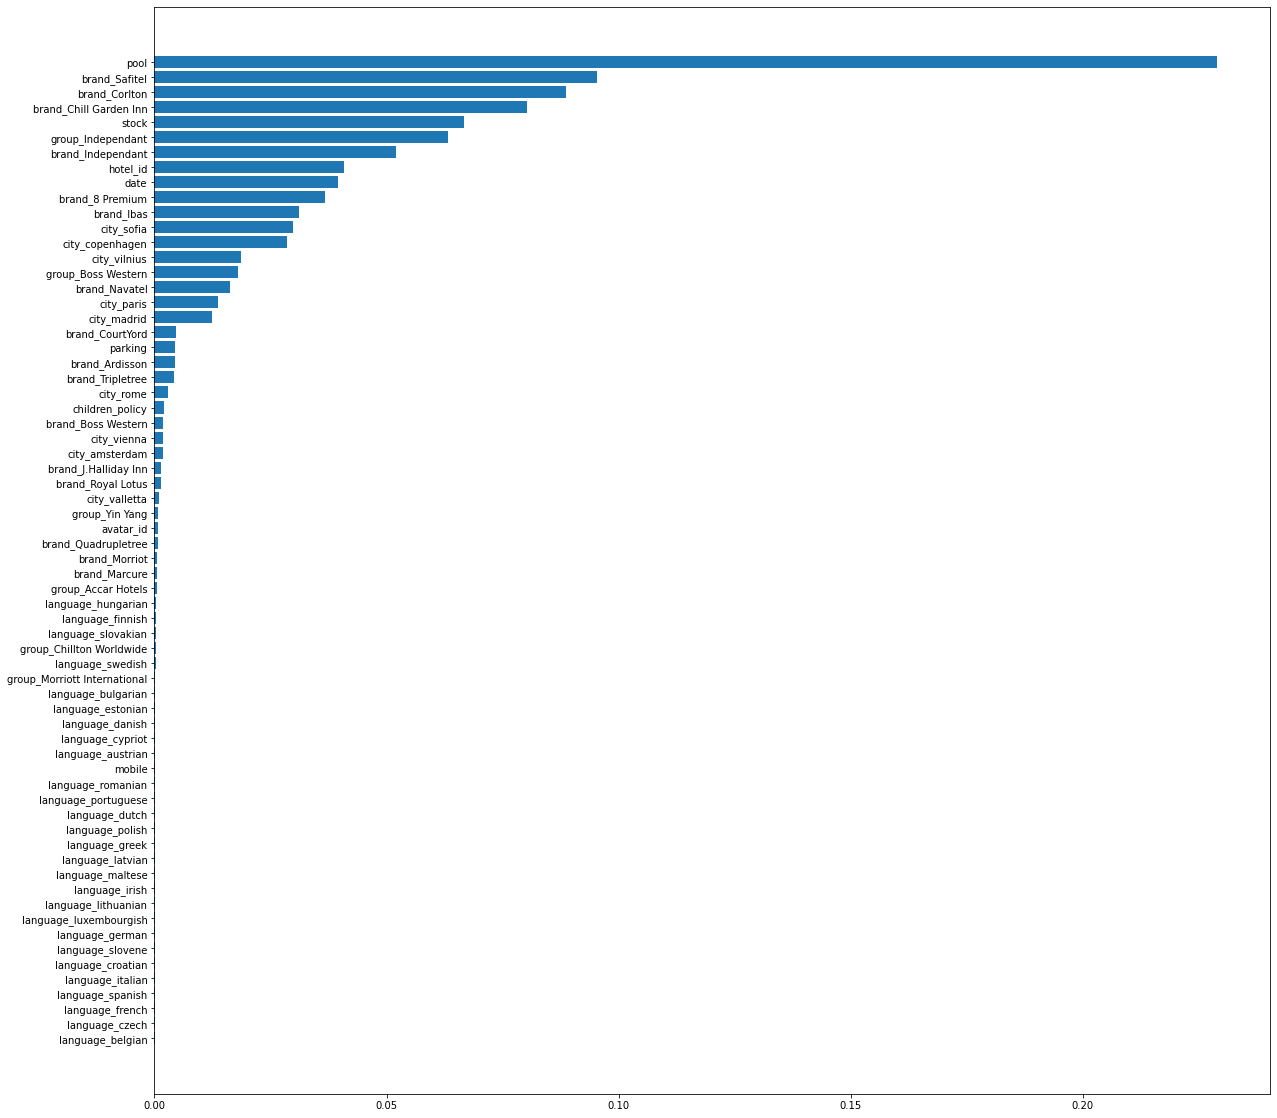

In [ ]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_dummies.columns)[indices])

In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 131 kB/s
     |████████████████████████████████| 102 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 926 kB/s 
     |████████████████████████████████| 9.9 MB 45.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=325000 sha256=239a7e91cde5128e3b51b5c08ce5c98f99b19ab9c6f7ce049d7fd44f6420ef55
  Stored in directory: /tmp/pip-ephem-wheel-cache-fjbztp79/wheels/c3/aa/10/94ee985ca5a122f047c430cf991df62fe210c4789d3b5762a5
Failed to build pandas-profiling
  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found existing

In [ ]:
import pandas_profiling as pdp 
X.head()
profile = pdp.ProfileReport(X)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = pdp.ProfileReport(X_dummies)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_dummies,y)
y_pred_GBR = GBR.predict(X_test_dummies)
y_pred_GBR = pd.Series(y_pred_GBR)

In [ ]:
index = test_set_joined['index']
df_submission_GBR = pd.concat([index,y_pred_GBR], axis=1)
df_submission_GBR.columns = ['index' , 'price']
df_submission_GBR.head()

index       price
0      0  117.117247
1      1  152.628065
2      2   65.054635
3      3   63.989203
4      4  214.560474

In [ ]:
df_submission_GBR.to_csv('submission_GBR.csv',index=False)

# RAJOUT DES DATASETS V2

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving dataset_v2_1.csv to dataset_v2_1.csv
Saving dataset_v2_2.csv to dataset_v2_2.csv


In [ ]:
df1_v2 = pd.read_csv(io.BytesIO(uploaded['dataset_v2_1.csv']))
df2_v2 = pd.read_csv(io.BytesIO(uploaded['dataset_v2_2.csv']))

In [ ]:
df_v2 = pd.concat([df1,df2,df3,df4,df5,df6,df1_v2,df2_v2])
df_final_v2 = df_v2.join(hotels, on=['hotel_id', 'city'])
y_v2 = df_final_v2['price']
X_v2 = df_final_v2.drop(['Unnamed: 0','price'], axis=1)
rf = RandomForestRegressor()
X_test = test_set_joined[['hotel_id','stock','city','date','language','mobile', 'avatar_id','group','brand','parking','pool','children_policy']]
X_dummies_v2 = pd.get_dummies(X_v2)
rf.fit(X_dummies_v2,y_v2)
X_test_dummies = pd.get_dummies(X_test)
y_pred_v2 = rf.predict(X_test_dummies)
y_pred_v2 = pd.Series(y_pred_v2)

In [ ]:
df_submission_v2 = pd.concat([index,y_pred_v2], axis=1)
df_submission_v2.columns = ['index' , 'price']

In [ ]:
df_submission_v2.head()

index   price
0      0  113.06
1      1  141.79
2      2   55.65
3      3   58.84
4      4  191.47

In [ ]:
df_submission_v2.to_csv('submission_v2.csv',index=False)

In [ ]:
GBR.fit(X_dummies_v2,y_v2)
y_pred_GBR_v2 = GBR.predict(X_test_dummies)
y_pred_GBR_v2 = pd.Series(y_pred_GBR_v2)
index = test_set_joined['index']
df_submission_GBR_v2 = pd.concat([index,y_pred_GBR_v2], axis=1)
df_submission_GBR_v2.columns = ['index' , 'price']
df_submission_GBR_v2.head()

index       price
0      0  113.935781
1      1  145.950062
2      2   61.201762
3      3   59.955600
4      4  224.386554

In [ ]:
df_submission_GBR_v2.to_csv('submission_GBR_v2.csv',index=False)

# ENLEVER LES ID

In [ ]:
import pandas as pd
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
sample = pd.read_csv('sample_submission.csv')
test_set = pd.read_csv('test_set.csv')
df1 = pd.read_csv('dataset_1.csv')
df2 = pd.read_csv('dataset_2.csv')
df3 = pd.read_csv('dataset_3.csv')
df4 = pd.read_csv('dataset_4.csv')
df5 = pd.read_csv('dataset_5.csv')
df6 = pd.read_csv('dataset_6.csv')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.concat([df1,df2,df3,df4,df5,df6])
#df.head()
df_final = df.join(hotels, on=['hotel_id', 'city'])
#df_final.head()
test_set_joined = test_set.join(hotels, on=['hotel_id', 'city'])
#test_set_joined.head()
index = test_set_joined['index']
y = df_final['price']
X = df_final.drop(['Unnamed: 0','price'], axis=1)
X_test = test_set_joined[['hotel_id','stock','city','date','language','mobile', 'avatar_id','group','brand','parking','pool','children_policy']]
#X_dummies = pd.get_dummies(X)
#X_test_dummies = pd.get_dummies(X_test)
X_test.head()

hotel_id  stock     city  date  language  mobile  avatar_id         group  \
0       161     46  vilnius    21  romanian       0          1  Boss Western   
1       187     32  vilnius    21  romanian       0          1  Accar Hotels   
2       279     12  vilnius    21  romanian       0          1   Independant   
3       395     10  vilnius    21  romanian       0          1  Accar Hotels   
4       488     42  vilnius    21  romanian       0          1  Accar Hotels   

            brand  parking  pool  children_policy  
0  J.Halliday Inn        1     0                0  
1         Marcure        1     1                0  
2     Independant        1     0                0  
3            Ibas        0     0                0  
4         Safitel        1     1                1

removing ids


In [ ]:
X_ids = X[['hotel_id','avatar_id']]
X_test_ids = X_test[['hotel_id','avatar_id']]
X = X.drop(['hotel_id','avatar_id'], axis=1)
X_test = X_test.drop(['hotel_id','avatar_id'], axis=1)

In [ ]:
X_dummies = pd.get_dummies(X)
X_test_dummies = pd.get_dummies(X_test)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_dummies,y)
y_pred = rf.predict(X_test_dummies)
y_pred = pd.Series(y_pred)

In [ ]:
index = test_set_joined['index']
df_submission = pd.concat([index,y_pred], axis=1)
df_submission.columns = ['index' , 'price']
df_submission.head()

index       price
0      0  110.401667
1      1  150.300000
2      2   76.143087
3      3   59.170000
4      4  191.150000

In [ ]:
df_submission.to_csv('submission_RF_sans_id.csv',index=False)

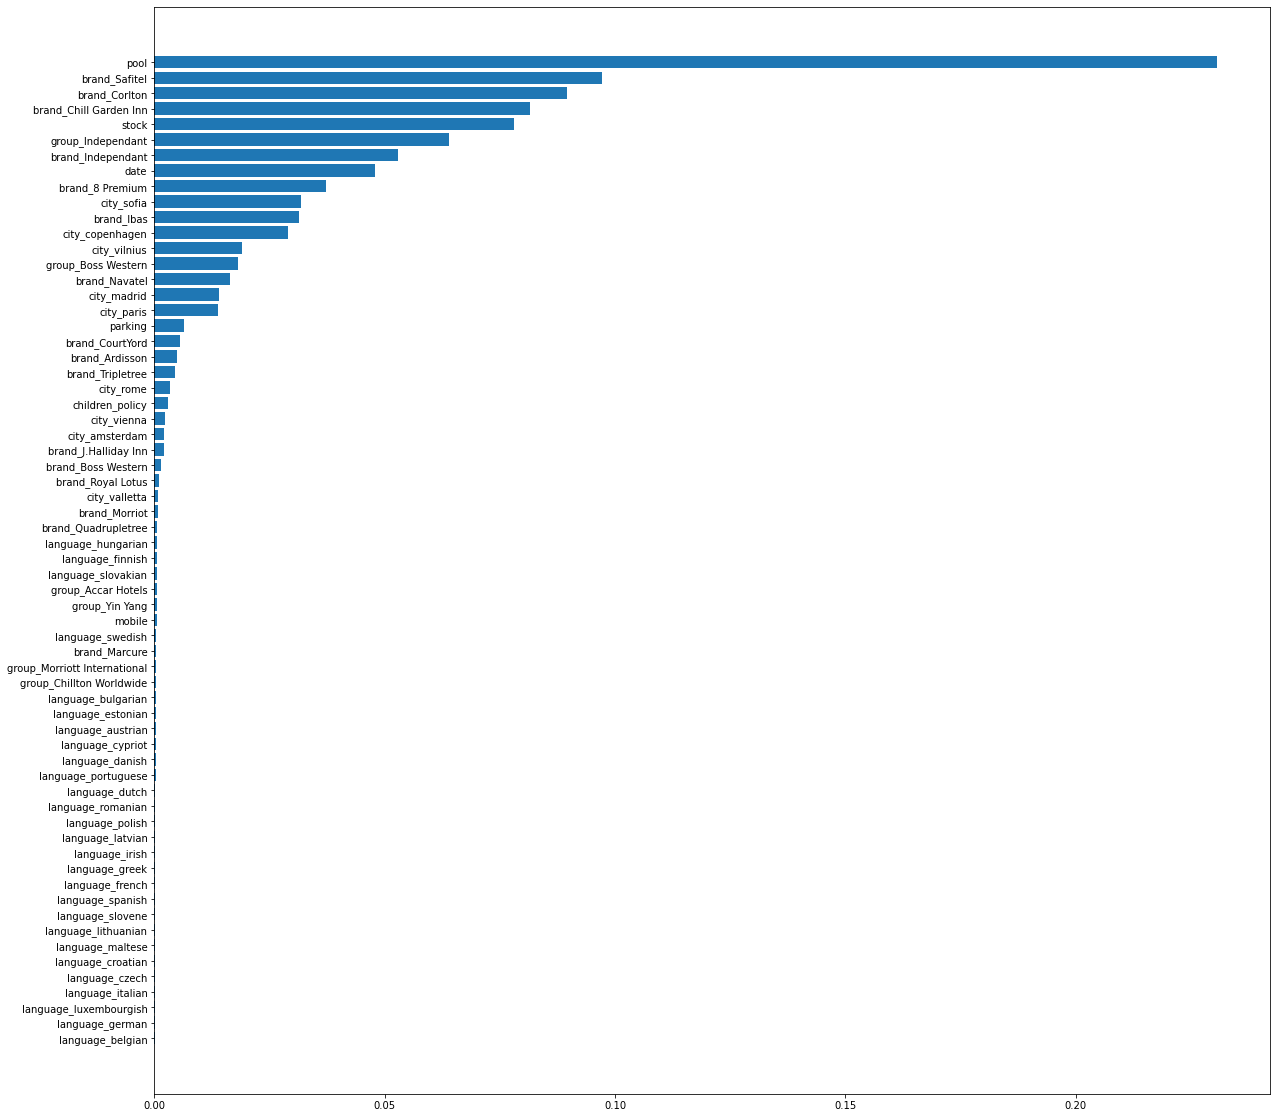

In [ ]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_dummies.columns)[indices])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_dummies,y)
y_pred_GBR = GBR.predict(X_test_dummies)
y_pred_GBR = pd.Series(y_pred_GBR)

In [ ]:
index = test_set_joined['index']
df_submission_GBR = pd.concat([index,y_pred_GBR], axis=1)
df_submission_GBR.columns = ['index' , 'price']
df_submission_GBR.head()

index       price
0      0  115.486851
1      1  153.180314
2      2   64.857518
3      3   63.964300
4      4  213.849134

In [ ]:
df_submission_GBR.to_csv('submission_GBR_sans_id.csv',index=False)

# TARGET ENCODING

In [ ]:
#Cellule ou on aura df final
df1000_1 = pd.read_csv('dataset_1000_1.csv')
df1000_2 = pd.read_csv('dataset_1000_2.csv')
df1000_3 = pd.read_csv('dataset_1000_3.csv')
dfv2_1 = pd.read_csv('dataset_v2_1.csv')
dfv2_2 = pd.read_csv('dataset_v2_2.csv')
df_yanaser_1 = pd.read_csv('yanaser_1.csv')
df_yanaser_2 = pd.read_csv('yanaser_2.csv')
df_ma_1=pd.read_csv('dataset_MA_200_random.csv')
df_ma_2=pd.read_csv('dataset_MA_200_random_2.csv')
df_ma_3=pd.read_csv('dataset_MA_ordonne_1.csv')
df_ma_4=pd.read_csv('dataset_MA_ordonne_2.csv')
df_ma_5=pd.read_csv('dataset_MA_ordonne_3.csv')
df_dernier_1=pd.read_csv('dataset_500_1.csv')
df_dernier_2=pd.read_csv('dataset_500_2.csv')
df = pd.concat([df1,df2,df3,df4,df5,df6,df1000_1,df1000_2,df1000_3,dfv2_1,dfv2_2
                ,df_yanaser_1,df_yanaser_2,df_ma_1,df_ma_2,df_ma_3,df_ma_4,df_ma_5,df_dernier_1,df_dernier_2])
#df.head()
df_final = df.join(hotels, on=['hotel_id', 'city'])
dataset = df_final.copy()
dataset = dataset.drop(['Unnamed: 0','hotel_id','avatar_id'], axis=1)
dataset.head()

price  stock       city  date  language  mobile               group  \
0     83      0  amsterdam     5  austrian       1         Independant   
1    184      0  amsterdam     5  austrian       1         Independant   
2    214      6  amsterdam     5  austrian       1        Accar Hotels   
3    439      5  amsterdam     5  austrian       1        Accar Hotels   
4    182      1  amsterdam     5  austrian       1  Chillton Worldwide   

         brand  parking  pool  children_policy  
0  Independant        1     0                0  
1  Independant        0     0                0  
2      Marcure        0     0                0  
3      Safitel        1     0                0  
4   Tripletree        0     0                0

In [ ]:
dataset['city_encoded'] = dataset.groupby("city")["price"].transform("mean")
dataset['language_encoded'] = dataset.groupby("language")["price"].transform("mean")
dataset['group_encoded'] = dataset.groupby("group")["price"].transform("mean")
dataset['brand_encoded'] = dataset.groupby("brand")["price"].transform("mean")
dataset.head()

price  stock       city  date  language  mobile               group  \
0     83      0  amsterdam     5  austrian       1         Independant   
1    184      0  amsterdam     5  austrian       1         Independant   
2    214      6  amsterdam     5  austrian       1        Accar Hotels   
3    439      5  amsterdam     5  austrian       1        Accar Hotels   
4    182      1  amsterdam     5  austrian       1  Chillton Worldwide   

         brand  parking  pool  children_policy  city_encoded  \
0  Independant        1     0                0      168.7538   
1  Independant        0     0                0      168.7538   
2      Marcure        0     0                0      168.7538   
3      Safitel        1     0                0      168.7538   
4   Tripletree        0     0                0      168.7538   

   language_encoded  group_encoded  brand_encoded  
0        164.038951      95.479815      95.479815  
1        164.038951      95.479815      95.479815  
2        164.038951     190.867051     202.314859  
3        164.038951     190.867051     300.208264  
4        164.038951     223.216665     152.261371

In [ ]:
df_train = dataset.drop(['city','language','group','brand','price'],axis=1)
df_train.head()

stock  date  mobile  parking  pool  children_policy  city_encoded  \
0      0     5       1        1     0                0      168.7538   
1      0     5       1        0     0                0      168.7538   
2      6     5       1        0     0                0      168.7538   
3      5     5       1        1     0                0      168.7538   
4      1     5       1        0     0                0      168.7538   

   language_encoded  group_encoded  brand_encoded  
0        164.038951      95.479815      95.479815  
1        164.038951      95.479815      95.479815  
2        164.038951     190.867051     202.314859  
3        164.038951     190.867051     300.208264  
4        164.038951     223.216665     152.261371

In [ ]:
df_test = X_test.copy()
df_test.head()

stock     city  date  language  mobile         group           brand  \
0     46  vilnius    21  romanian       0  Boss Western  J.Halliday Inn   
1     32  vilnius    21  romanian       0  Accar Hotels         Marcure   
2     12  vilnius    21  romanian       0   Independant     Independant   
3     10  vilnius    21  romanian       0  Accar Hotels            Ibas   
4     42  vilnius    21  romanian       0  Accar Hotels         Safitel   

   parking  pool  children_policy  
0        1     0                0  
1        1     1                0  
2        1     0                0  
3        0     0                0  
4        1     1                1

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 3.2 MB/s eta 0:00:00


In [ ]:
df_test_encoder = df_final.drop(['Unnamed: 0','hotel_id','avatar_id'], axis=1)
from category_encoders import TargetEncoder
encoder1 = TargetEncoder()
encoder2 = TargetEncoder()
encoder3 = TargetEncoder()
encoder4 = TargetEncoder()
encoder1.fit(df_test_encoder['city'],df_test_encoder['price'])
encoder2.fit(df_test_encoder['language'],df_test_encoder['price'])
encoder3.fit(df_test_encoder['group'],df_test_encoder['price'])
encoder4.fit(df_test_encoder['brand'],df_test_encoder['price'])
city_encoded = encoder1.transform(df_test_encoder['city'])
language_encoded = encoder2.transform(df_test_encoder['language'])
group_encoded = encoder3.transform(df_test_encoder['group'])
brand_encoded = encoder4.transform(df_test_encoder['brand'])

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [ ]:
df_test_encoder['city_encoded']=city_encoded
df_test_encoder['language_encoded']=language_encoded
df_test_encoder['group_encoded']=group_encoded
df_test_encoder['brand_encoded']=brand_encoded
df_test_encoder.head()

price  stock       city  date  language  mobile               group  \
0     83      0  amsterdam     5  austrian       1         Independant   
1    184      0  amsterdam     5  austrian       1         Independant   
2    214      6  amsterdam     5  austrian       1        Accar Hotels   
3    439      5  amsterdam     5  austrian       1        Accar Hotels   
4    182      1  amsterdam     5  austrian       1  Chillton Worldwide   

         brand  parking  pool  children_policy  city_encoded  \
0  Independant        1     0                0      168.7538   
1  Independant        0     0                0      168.7538   
2      Marcure        0     0                0      168.7538   
3      Safitel        1     0                0      168.7538   
4   Tripletree        0     0                0      168.7538   

   language_encoded  group_encoded  brand_encoded  
0        164.038951      95.479815      95.479815  
1        164.038951      95.479815      95.479815  
2        164.038951     190.867051     202.314859  
3        164.038951     190.867051     300.208264  
4        164.038951     223.216665     152.261371

In [ ]:
X_test.head()

stock     city  date  language  mobile         group           brand  \
0     46  vilnius    21  romanian       0  Boss Western  J.Halliday Inn   
1     32  vilnius    21  romanian       0  Accar Hotels         Marcure   
2     12  vilnius    21  romanian       0   Independant     Independant   
3     10  vilnius    21  romanian       0  Accar Hotels            Ibas   
4     42  vilnius    21  romanian       0  Accar Hotels         Safitel   

   parking  pool  children_policy  
0        1     0                0  
1        1     1                0  
2        1     0                0  
3        0     0                0  
4        1     1                1

In [ ]:
XX_test = X_test.copy()
XX_test['city_encoded']=encoder1.transform(XX_test['city'])
XX_test['language_encoded']=encoder2.transform(XX_test['language'])
XX_test['group_encoded']=encoder3.transform(XX_test['group'])
XX_test['brand_encoded']=encoder4.transform(XX_test['brand'])
XX_test.head()

stock     city  date  language  mobile         group           brand  \
0     46  vilnius    21  romanian       0  Boss Western  J.Halliday Inn   
1     32  vilnius    21  romanian       0  Accar Hotels         Marcure   
2     12  vilnius    21  romanian       0   Independant     Independant   
3     10  vilnius    21  romanian       0  Accar Hotels            Ibas   
4     42  vilnius    21  romanian       0  Accar Hotels         Safitel   

   parking  pool  children_policy  city_encoded  language_encoded  \
0        1     0                0    110.739518         150.00234   
1        1     1                0    110.739518         150.00234   
2        1     0                0    110.739518         150.00234   
3        0     0                0    110.739518         150.00234   
4        1     1                1    110.739518         150.00234   

   group_encoded  brand_encoded  
0     134.832325     147.337427  
1     190.867051     202.314859  
2      95.479815      95.479815  
3     190.867051      79.627311  
4     190.867051     300.208264

In [ ]:
y = df_test_encoder['price']
df_train = df_test_encoder.drop(['price','city','language','group','brand'], axis=1)
XX_test = XX_test.drop(['city','language','group','brand'], axis=1)
df_train.head()

stock  date  mobile  parking  pool  children_policy  city_encoded  \
0      0     5       1        1     0                0      168.7538   
1      0     5       1        0     0                0      168.7538   
2      6     5       1        0     0                0      168.7538   
3      5     5       1        1     0                0      168.7538   
4      1     5       1        0     0                0      168.7538   

   language_encoded  group_encoded  brand_encoded  
0        164.038951      95.479815      95.479815  
1        164.038951      95.479815      95.479815  
2        164.038951     190.867051     202.314859  
3        164.038951     190.867051     300.208264  
4        164.038951     223.216665     152.261371

In [ ]:
index = test_set_joined['index']
XX_test.head()

stock  date  mobile  parking  pool  children_policy  city_encoded  \
0     46    21       0        1     0                0    110.739518   
1     32    21       0        1     1                0    110.739518   
2     12    21       0        1     0                0    110.739518   
3     10    21       0        0     0                0    110.739518   
4     42    21       0        1     1                1    110.739518   

   language_encoded  group_encoded  brand_encoded  
0         150.00234     134.832325     147.337427  
1         150.00234     190.867051     202.314859  
2         150.00234      95.479815      95.479815  
3         150.00234     190.867051      79.627311  
4         150.00234     190.867051     300.208264

In [ ]:
import time

start = time.time()



from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
GBR = XGBRegressor()
GBR.fit(df_train,y)
y_pred_encoded = GBR.predict(XX_test)
y_pred_encoded = pd.Series(y_pred_encoded)


end = time.time()
print(end - start)

[21:17:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
22.505032062530518


In [ ]:
GBR.score(df_train,y)

0.9437087194469477

In [ ]:
y_pred_encoded

0       106.331528
1       133.489807
2        70.835526
3        59.638973
4       182.641251
           ...    
6639     84.693237
6640    258.545807
6641    143.917816
6642    176.320465
6643    143.917816
Length: 6644, dtype: float32

In [ ]:
df_submission_GBR_encoded_complete = pd.concat([index,y_pred_encoded], axis=1)
df_submission_GBR_encoded_complete.columns = ['index' , 'price']
df_submission_GBR_encoded_complete.head()

index       price
0      0  106.331528
1      1  133.489807
2      2   70.835526
3      3   59.638973
4      4  182.641251

In [ ]:
df_submission_GBR_encoded_complete.to_csv('submission_final.csv',index=False)